In [3]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
 
# fetch dataset 
steel_industry_energy_consumption = fetch_ucirepo(id=851) 
 
# data (as pandas dataframes) 
X = steel_industry_energy_consumption.data.features 
y = steel_industry_energy_consumption.data.targets 


In [4]:
pd.options.mode.copy_on_write = True

In [5]:
X.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday


In [6]:
scaler = StandardScaler()
numeric_features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
X[numeric_features] = scaler.fit_transform(X[numeric_features])
X = X.drop(columns=['WeekStatus', 'Day_of_week'])


In [7]:
X.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015
1,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929
2,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843
3,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756
4,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670


In [8]:
label_encoder = LabelEncoder()
y['Load_Type'] = label_encoder.fit_transform(y['Load_Type'])

In [9]:
y_data = pd.get_dummies(y['Load_Type']).values
X_data = X.values

In [87]:
seq_len = 7
X_seq = []
Y_seq = []

for i in range(len(X_data) - seq_len):
    X_seq.append(X_data[i:(i + seq_len)])
    Y_seq.append(y_data[i + seq_len])

X_seq = np.array(X_seq)
Y_seq = np.array(Y_seq)[:, :, np.newaxis]

In [11]:
import os
import sys
os.path.abspath(sys.argv[0])

'C:\\Users\\laris\\anaconda3\\envs\\gpu\\lib\\site-packages\\ipykernel_launcher.py'

In [14]:
from RNN.neural_network import NeuralNetwork
from RNN.dense_layer import DenseLayer
from RNN.rnn import RNN
from RNN.activation_functions import *
from sklearn.model_selection import train_test_split

In [79]:
model = NeuralNetwork()
model.add_layer(RNN(output_size=24, activation='tanh', input_size=7, return_sequence=True))
model.add_layer(RNN(output_size=10, activation='tanh'))
model.add_layer(DenseLayer(neurons_count=3, activation='none'))

model.init()
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, Y_seq, test_size=0.2, random_state=0)

In [85]:
error = 0
i = 0
while True:
    index = i % len(X_train)
    error += model.fit(X_train[index], y_train[index], 0.0001)

    if i % 10000 == 9999:
        print(error / 10000)
        error = 0
    i += 1

0.419725760898553
0.4267185016130173
0.4235704606228688
0.4258810018611207
0.4244600966586476
0.4243921088438743
0.4216136394613477
0.4274015133239017
0.42603883342385934
0.42098371604103957
0.42505581130803055
0.42714275573197347
0.4188745324802003
0.42906825491097633
0.4197348012717724
0.4251333427872397
0.4246614455422048
0.42395095343986716
0.4245192688913326
0.42569719469978445
0.4207150877386818
0.4289598295296703
0.42603333360152357
0.4210193152569138
0.4258420697223005
0.4283241693334523
0.4209612862060253
0.4289223757830643
0.4216495401486418
0.42734563644002976
0.42542389638118966
0.4254964012248597
0.42526375204051503
0.42787475541758385
0.42196575138632586
0.4290863196350121
0.4279356620197268
0.42183455031053807
0.4257189523266503
0.4300900754904444
0.42067923773486043
0.4281477975323348
0.42424166672331004


KeyboardInterrupt: 

In [90]:
y_predicted = np.zeros((len(y_test), 3, 1))
for i in range(len(y_test)):
    y_predicted[i] = model.predict(X_test[i])

In [92]:
err = 0
for i in range(len(y_test)):
    err += (np.sum(np.abs(y_predicted[i]-y_test[i])) > 0.8)

In [94]:
print(err / len(y_test))

0.2097902097902098


In [105]:
from RNN.metrics_2 import *

In [106]:
print_metrics(y_predicted, y_test)

0: precision: 0.9472682794237565 recall: 0.9748251748251748 f1: 0.9608491866556383
1: precision: 0.7332832456799399 recall: 0.6612466124661247 f1: 0.6954043462771643
2: precision: 0.7384535547483134 recall: 0.7275051124744376 f1: 0.7329384496523307
macro precision: 0.8063350266173366
macro recall: 0.787858966588579
micro precision: 0.848205276055932
micro recall: 0.8397316968745541


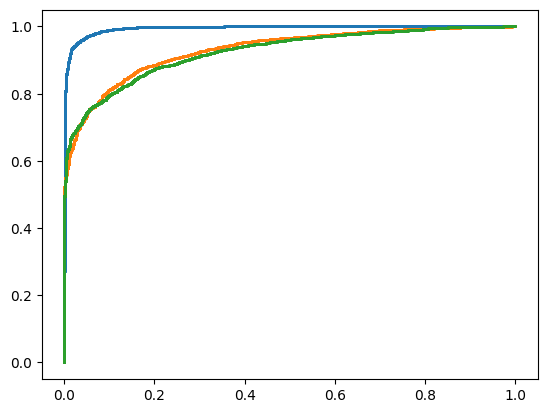

In [107]:
for i in range(3):
    roc_curve(y_predicted, y_test, i)

In [16]:
from RNN.lstm import LSTM

In [44]:
model_lstm = NeuralNetwork()
model_lstm.add_layer(LSTM(output_size=24, activation='tanh', input_size=7, return_sequence=True))
model_lstm.add_layer(LSTM(output_size=10, activation='tanh'))
model_lstm.add_layer(DenseLayer(neurons_count=3, activation='none'))

model_lstm.init()

In [74]:
error = 0
i = 0
while True:
    index = i % len(X_train)
    error += model_lstm.fit(X_train[index], y_train[index], 0.000001)

    if i % 1000 == 999:
        print(error / 1000)
        error = 0
    i += 1

0.6669578418463319
0.6515881806456953
0.6811081795489178
0.6867022123558238
0.7252940191938131
0.6736710497952403
0.6698900828992602
0.6980648582965746
0.6765202079087386
0.6681835255679557
0.7287942772551224
0.7047496092779019
0.6675333195843807
0.6766410825162956
0.6684815951428328
0.7017426688016328
0.6840727335455005
0.677948013158834
0.6957402317646199
0.6801106423737097
0.6761471228729392
0.6887947560795944
0.6463995702293739
0.7010705803704553
0.6749668949637617
0.6704547021692728
0.6672037000027133
0.6939714423477472
0.6598366001508774
0.6547240046205183
0.6851524739119007
0.6809835985629689
0.7261048905171139
0.6731436092644221
0.6713995360972672
0.7004952953345648
0.672882842572344
0.6700715680214917
0.7335572605436191
0.6982934926172661
0.6728990997068776
0.6721252196873229
0.6681641586829374
0.7008427998345946
0.684727721313989
0.6769114272041868
0.6962356781274558
0.6809421643747702
0.6807103989157459
0.682954290538191
0.6531295342779267
0.689863308538818
0.673143507852736

KeyboardInterrupt: 

In [77]:
y_predicted = np.zeros((len(y_test), 3, 1))
for i in range(len(y_test)):
    y_predicted[i] = model_lstm.predict(X_test[i])

In [79]:
err = 0
for i in range(len(y_test)):
    err += (np.sum(np.abs(y_predicted[i]-y_test[i])) > 0.8)

In [80]:
err

3310

In [81]:
from RNN.metrics_2 import *

In [82]:
print_metrics(y_predicted, y_test)

0: precision: 0.8844654788418709 recall: 0.8914141414141414 f1: 0.8879262157629961
1: precision: 0.5292642140468228 recall: 0.4234113712374582 f1: 0.47045707915273133
2: precision: 0.610236220472441 recall: 0.4771677783478707 f1: 0.5355600345522603
macro precision: 0.6746553044537116
macro recall: 0.5973310969998235
micro precision: 0.7509505703422054
micro recall: 0.6763698630136986


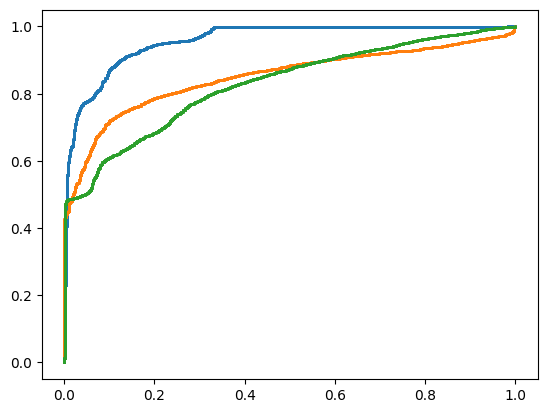

In [83]:
for i in range(3):
    roc_curve(y_predicted, y_test, i)

In [84]:
from RNN.gru import GRU

In [89]:
model_gru = NeuralNetwork()
model_gru.add_layer(GRU(output_size=24, activation='tanh', input_size=7, return_sequence=True))
model_gru.add_layer(GRU(output_size=10, activation='tanh'))
model_gru.add_layer(DenseLayer(neurons_count=3, activation='none'))

model_gru.init()

In [91]:
error = 0
i = 0
while True:
    index = i % len(X_train)
    error += model_gru.fit(X_train[index], y_train[index], 0.0000001)

    if i % 1000 == 999:
        print(error / 1000)
        error = 0
    i += 1

0.6639532146896304
0.6393675271525641
0.7032465971024578
0.68121249571536
0.6939794179611968
0.6728582031092304
0.6805961086603951
0.6738118242119578
0.6543998780625164
0.6594550339040127
0.683562336517814
0.6764023418447535
0.6587272570105398
0.6704242916268411
0.6482760261325646
0.6957514465785012
0.654849484934584
0.6505470694776609
0.6716311255952288
0.6857565909135755
0.6515547026665379
0.6828531616988558
0.6393042352979068
0.6909377443189366
0.6603266916719788
0.6689954709065365
0.6673916616551732
0.6754593678780191
0.6594763420391072
0.6426538859117519
0.6995502140150894
0.6827405950752348
0.692563710192942
0.6719518146857527
0.6768098010227989
0.6789394197179515
0.6547557364449915
0.6570585320107953
0.6860836308103785
0.6719384917708786
0.659987099709133
0.6668121149233547
0.6495426792129414
0.6890811484273398
0.6562907796527948
0.6579327799342638
0.6681870062052992
0.6815145294769557
0.6583034625084718
0.6781472047193885
0.6434769224303001
0.6834143490209028
0.6596637415699005

KeyboardInterrupt: 

In [92]:
y_predicted = np.zeros((len(y_test), 3, 1))
for i in range(len(y_test)):
    y_predicted[i] = model_gru.predict(X_test[i])

In [93]:
err = 0
for i in range(len(y_test)):
    err += (np.sum(np.abs(y_predicted[i]-y_test[i])) > 0.8)

In [94]:
err


2708

In [95]:
print_metrics(y_predicted, y_test)

0: precision: 0.8611182027061527 recall: 0.9434965034965035 f1: 0.900427122263748
1: precision: 0.607563025210084 recall: 0.4898373983739837 f1: 0.5423855963990997
2: precision: 0.6284584980237155 recall: 0.48773006134969327 f1: 0.5492227979274612
macro precision: 0.6990465753133174
macro recall: 0.6403546544067268
micro precision: 0.7622641509433963
micro recall: 0.7207078635650064


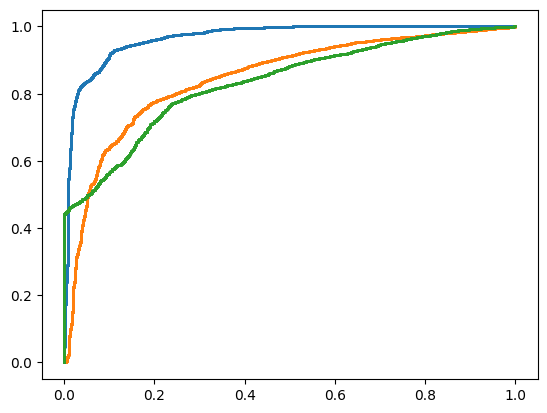

In [96]:
for i in range(3):
    roc_curve(y_predicted, y_test, i)